# Applied Machine Learning, Homework 1: 

# Concepts Related to Machine Learning

1) supervised learning : AI model is trained to predict target values from labelled data.

2) unsupervised learning : AI model trains with input data that does not have any labels, instead, it finds structure/clusters in the input data. 

3) online learning: This AI model learns incrementally as it is fed new data, where the system "learns on the fly". This is the opposite of batch learning. 

4) batch learning: This model performs offline learning, with all the available data, which understandably takes a lot of time and resources. Once it is launched into production, this model runs but does not learn anymore. This model will only use what it has learned in its past training.  

5) model-based learning: This is one approach to generalization. AI model works by detecting patterns in the training dta and building a predictive model. This approach is similar to instance-based learning, but it creates a model from its findings, and uses that model to make predictions.

6) instance-based learning: This is another approach to generalization. This learning is similar to "learning by heart" because it "memorizes" to predict, but instead of merely memorizing, it uses a "measure of similarity" to compare predictable instances with already seen instances. This AI model works by comparing new data points to known data points. 

Reference: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow
by Aurélien Géron

# Training Models : Polynomial Regression

Import required modules and load sample data. Do initial plot.

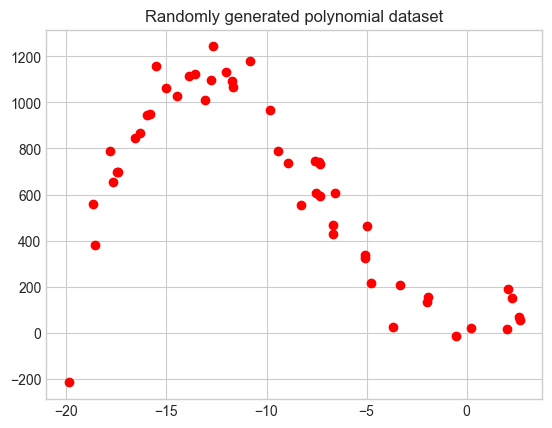

In [53]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-whitegrid') 
import numpy as np 
from sklearn.datasets import make_regression
 
noise_scale = 100 
number_of_samples = 50 
x =  25*(np.random.rand(number_of_samples, 1) - 0.8) 
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.figure()
plt.title('Randomly generated polynomial dataset')
plt.plot(x,y,'ro')

Q1. Plot the noisy data and the polynomial found, in the same figure. Use any value of m 
from 2, 3, 4, 5, 6, where m is the degree of the polynomial. Chosen m is 3

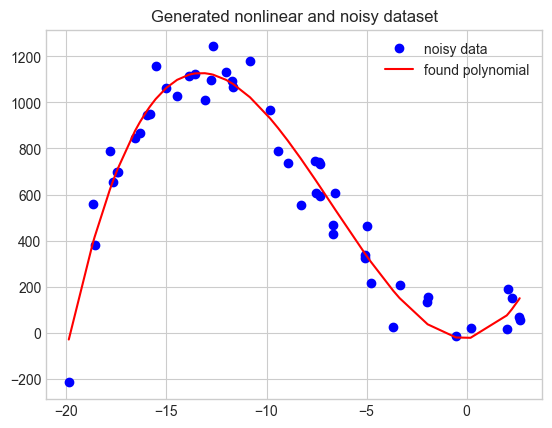

In [54]:
plt.figure()
plt.title('Generated nonlinear and noisy dataset')


plt.plot(x,y,'bo', label = 'noisy data')

# flatten() returns 1D flattened array for polyfit to take as input
xs = x.flatten()
ys = y.flatten()

z = np.polyfit(xs, ys, 3)
p = np.poly1d(z)

# sort coordinates to be able to plot (x, p(x)) correctly
s = np.argsort(xs)
xs = xs[s]
ys = ys[s]

plt.plot(xs, p(xs),'r', label = 'found polynomial')


plt.legend()
plt.show()

Q2. Plot MSE versus m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m and 
explain why.

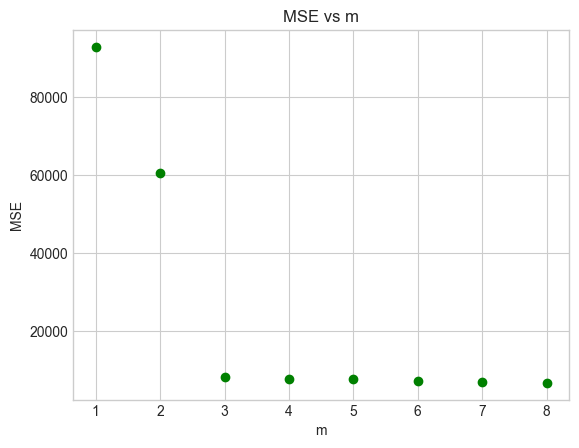

In [55]:
from sklearn.metrics import mean_squared_error
# mean_squared_error(y, y_pred)


plt.figure()
plt.title('MSE vs m')

# xs_mse = x.flatten()
# ys_mse = y.flatten()


m = [1, 2, 3, 4, 5, 6, 7, 8]
for degree in m:
    z = np.polyfit(xs, ys, degree)
    p = np.poly1d(z)

    y_pred = p(xs)

    mse = mean_squared_error(ys, y_pred)
    
    plt.xlabel('m')
    plt.ylabel('MSE')

    plt.plot(degree,mse,'go',label = 'MSE')


The best choice of m is 3. Accuracy is presumed to increase by reducing the Mean Squared Error. A lower MSE is a good thing. From m=1 to m=2 to m=3, there is a big decrease in MSE, however, any m higher than (i.e m=4 or m=8) does not produce a significantly lower MSE. Therefore, as to not be redundant, and to improve performance by only using the necessary sample size, it is best to choose 3.

Q3. Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, re-run the algorithm and 
plot the polynomials with the m found in 2). Discuss the impact of the noise scale on the 
accuracy of the returned parameters. [You need to plot a figure as in 1) for each choice of 
noise_scale.] 

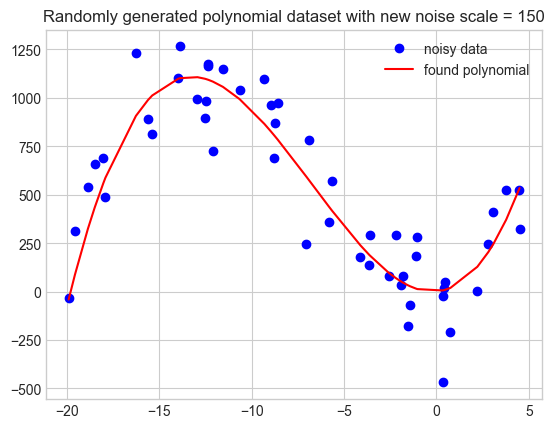

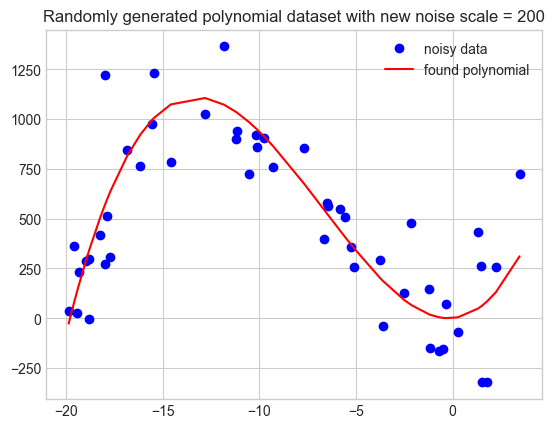

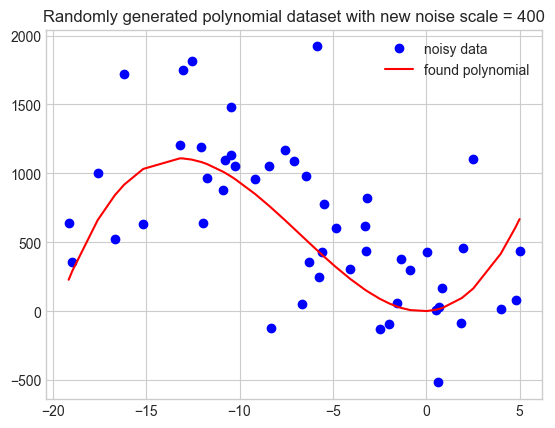

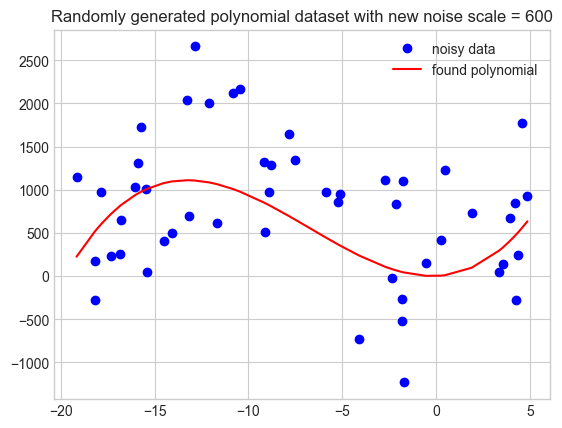

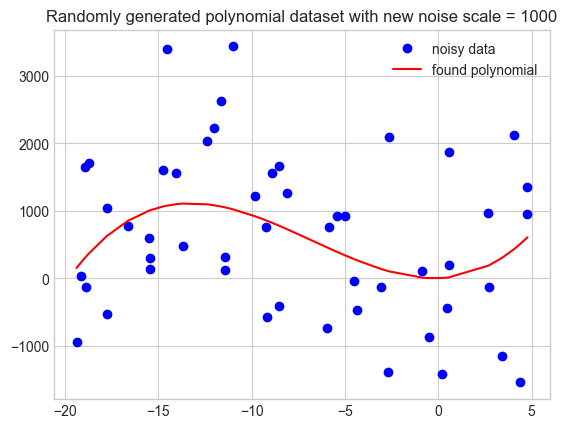

In [56]:
noise_scale_arr = [150, 200, 400, 600, 1000]

for noise in noise_scale_arr:
    
    #  number_of_samples = 50 
    x =  25*(np.random.rand(number_of_samples, 1) - 0.8) 
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise*np.random.randn(number_of_samples, 1)
    plt.figure()
    plt.title(f'Randomly generated polynomial dataset with new noise scale = {noise}')
    # flatten() returns 1D flattened array for polyfit to take as input
    xs = x.flatten()
    ys = y.flatten()

    z = np.polyfit(xs, ys, 3)
    p = np.poly1d(z_noise)

    # sort coordinates to be able to plot (x, p(x)) correctly
    s = np.argsort(xs)
    xs = xs[s]
    ys = ys[s]

    
    plt.plot(x,y,'bo', label = 'noisy data')
    plt.plot(xs, p(xs),'r', label = 'found polynomial')

    plt.legend()
    plt.show()
 

As the noise scale increases, the returned parameters get further away from the training data points. As a result, the higher noise scale causes the predicted polynomial to experience underfitting by overgeneralizing, which leads to less accuracy.

Q4. Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot 
the polynomials with the m found in 2). Discuss the impact of the number of samples on the 
accuracy of the returned parameters. [You need to plot a figure as in 1) for each choice of 
number_of_samples.] 

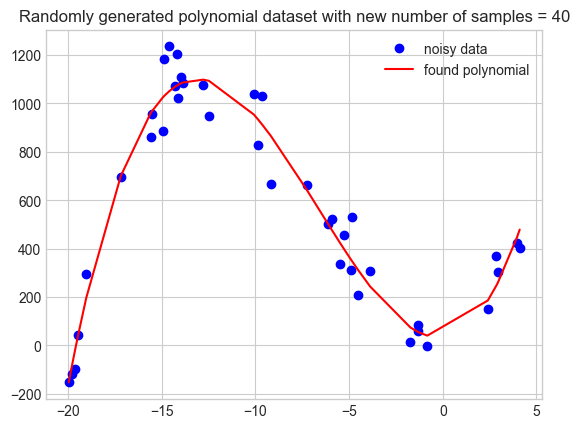

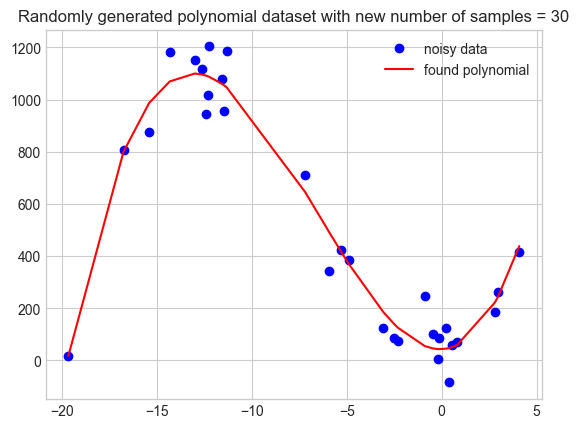

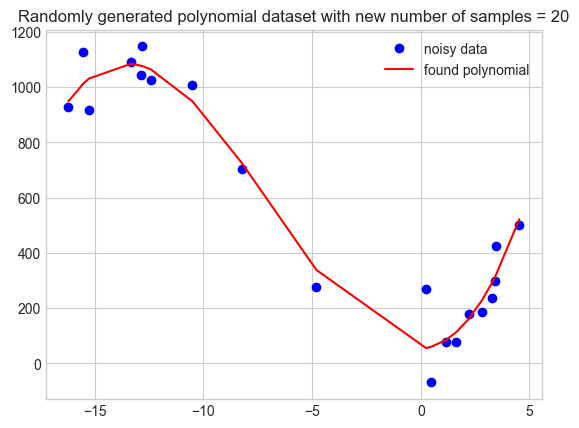

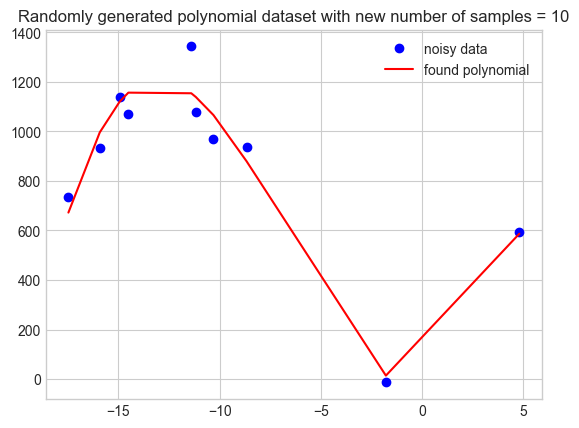

In [57]:
number_of_samples_arr = [40, 30, 20, 10]

for samples in number_of_samples_arr:
    
    noise_scale = 100
    x =  25*(np.random.rand(samples, 1) - 0.8) 
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(samples, 1)

    plt.figure()
    plt.title(f'Randomly generated polynomial dataset with new number of samples = {samples}')
    # flatten() returns 1D flattened array for polyfit to take as input
    xs = x.flatten()
    ys= y.flatten()

    z = np.polyfit(xs, ys, 3)
    p = np.poly1d(z)

    # sort coordinates to be able to plot (x, p(x)) correctly
    s = np.argsort(xs)
    xs = xs[s]
    ys = ys[s]
    

    plt.plot(x,y,'bo', label = 'noisy data')
    plt.plot(xs, p(xs),'r', label = 'found polynomial')

    plt.legend()
    plt.show()

The lesser number of samples yields a least-differentiated polynomial, therefore, the accuracy decreases. The predicted polynomial becomes less of a curve, instead, it takes "sharp turns", causing overfitting. The polynomial gets too close to some points, yet fails to generalize and will possibly leave a significant gap from any future outlier points.